In [8]:
import pandas as pd
df = pd.read_csv("1_conversion_data.csv")
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Data Character

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [10]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


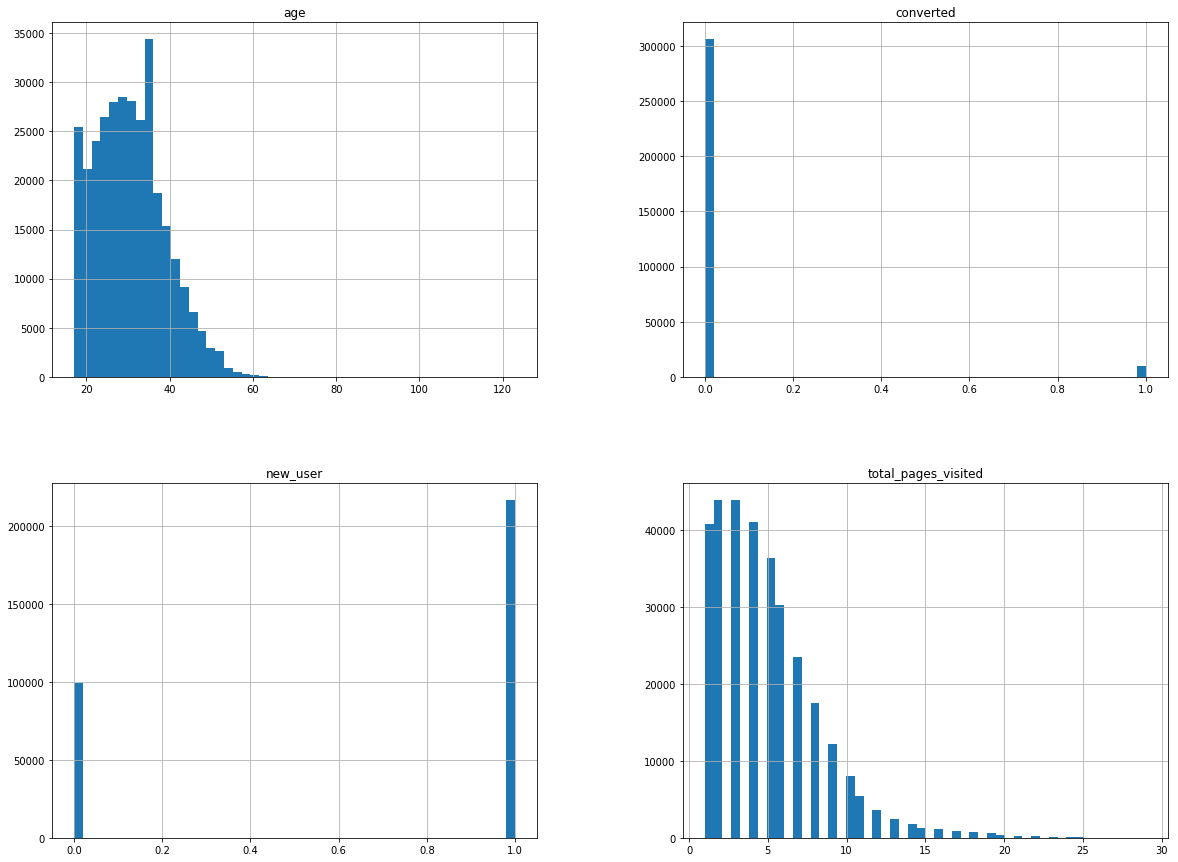

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [12]:
for column in df.columns:
    print('{0:20s} {1:5d}\t'.format(column, len(df[column].unique())))

country                  4	
age                     60	
new_user                 2	
source                   3	
total_pages_visited     29	
converted                2	


## Data Clean

In [17]:
df[df['age']> 80]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [18]:
df = df[df['age'] < 80 ]
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Data Analysis

### 1. conversion rate by country shows China has the lowest converstion rate.

In [28]:
group1 = df[['country', 'converted']].groupby('country')
group1['converted'].value_counts()

country  converted
China    0             76500
         1               102
Germany  0             12240
         1               815
UK       0             45900
         1              2549
US       0            171360
         1              6732
Name: converted, dtype: int64

In [29]:
conversion_rate = df[['country', 'converted']].groupby('country').mean().reset_index()
conversion_rate

,country,converted
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


###### SQL cmd:
SELECT country, SUM(converted)/COUNT(*) AS converate_rate 
FROM conversion_data
GROUP BY country

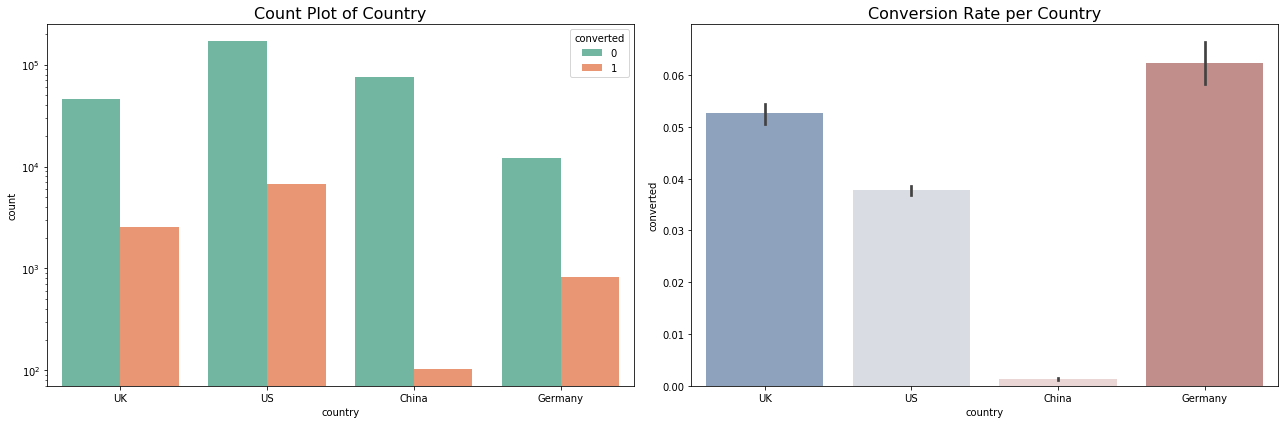

In [36]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=df, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

### 2. conversion rate by source

In [37]:
group2 = df[['source', 'converted']].groupby('source')
group2['converted'].value_counts()

source  converted
Ads     0             85680
        1              3059
Direct  0             70380
        1              2040
Seo     0            149940
        1              5099
Name: converted, dtype: int64

In [39]:
conversion_rate2 = df[['source', 'converted']].groupby('source').mean().reset_index()
conversion_rate2

,source,converted
0,Ads,0.034472
1,Direct,0.028169
2,Seo,0.032888


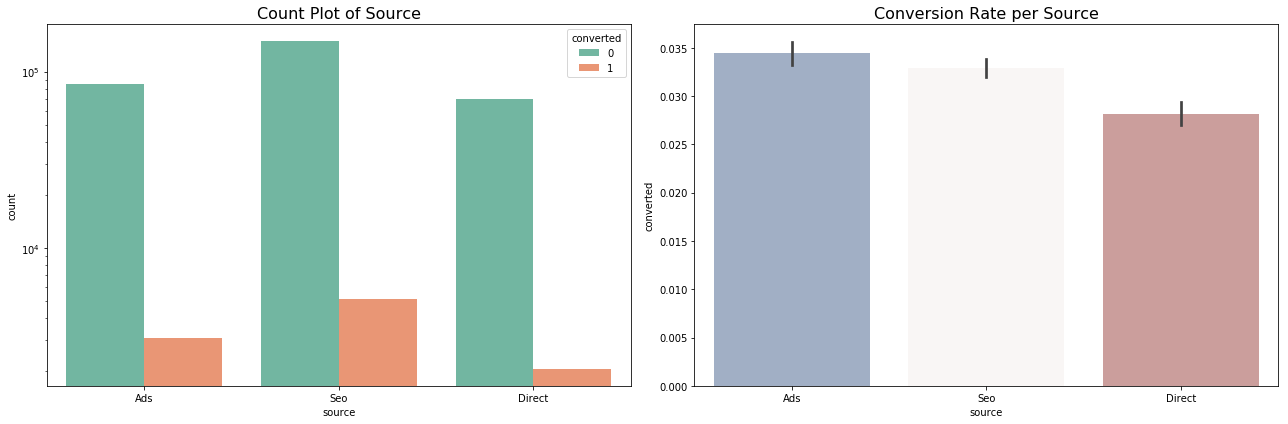

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0], palette="Set2")
ax[0].set_title('Count Plot of Source', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=df, ax=ax[1],palette="vlag");
ax[1].set_title('Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

### 3. conversion rate by user_type shows return user has higher conversion rate

In [41]:
group3 = df[['new_user', 'converted']].groupby('new_user')
group3['converted'].value_counts()

new_user  converted
0         0             92295
          1              7159
1         0            213705
          1              3039
Name: converted, dtype: int64

In [43]:
conversion_rate3= df[['new_user', 'converted']].groupby('new_user').mean()
conversion_rate3

,converted
new_user,
0,0.071983
1,0.014021


### 4. conversion rate by age shows that young user has higher conversion rate

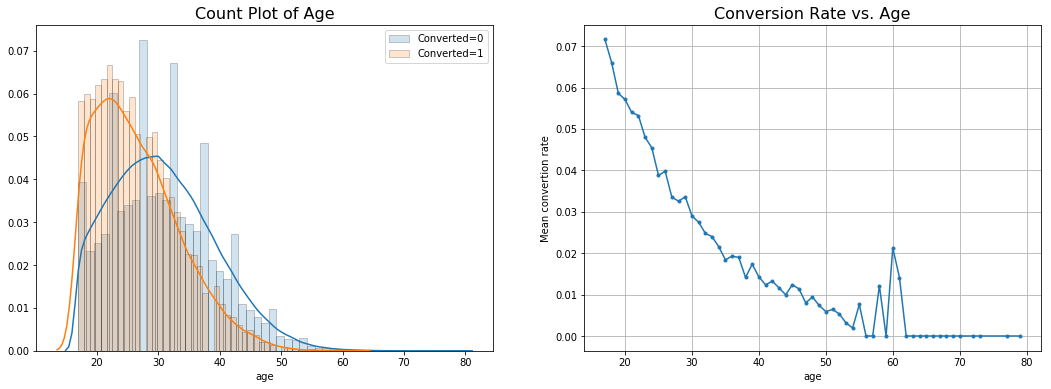

In [48]:
group4 = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted=0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted=1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(group4['age'], group4['converted'], '.-')
ax[1].set_title('Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

### 5. conversion rate by visited page numbers shows that users who visited more pages have higher chance to convert

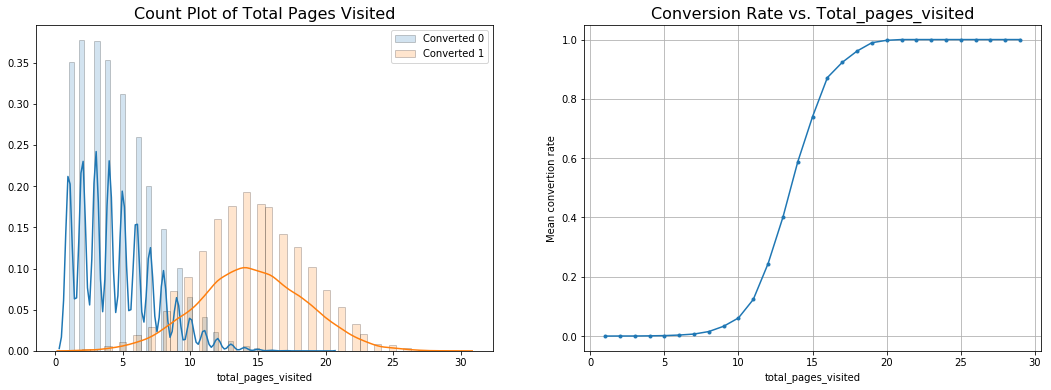

In [51]:
group5 = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total Pages Visited', fontsize=16)
ax[0].legend()
ax[1].plot(group5['total_pages_visited'], group5['converted'], '.-')
ax[1].set_title('Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()